In [1]:
import illustris_python as il
import snapshot as sn
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

In [2]:
basePath = basePath = '../sims.TNG/TNG100-3/output/'

In [3]:
h = 0.6774
SnapNum = 99
z = 0
a = 1 / (1 + z)

In [4]:
epsilon = 1e-10  # Small value to prevent log10(0)

In [5]:
header = il.groupcat.loadHeader(basePath, SnapNum)

In [6]:
total_halos = header['Ngroups_Total']

In [7]:
# random.seed(10) # To generate the same value everytime
# haloID = random.randint(0, total_halos)
haloID = 0 # Safety check

In [8]:
haloID

0

In [9]:
halo_data = il.groupcat.loadSingle(basePath, SnapNum, haloID)

In [10]:
halo_pos = halo_data['GroupPos']

In [11]:
partype = [0, 1, 4]

In [12]:
halo_data['GroupLenType']

array([ 789918, 1065204,       0,       0,   64058,     104], dtype=int32)

In [13]:
fields = ['Coordinates', 'Potential']

In [14]:
halo_size = halo_data['Group_R_Mean200'] 
halo_size

1707.1765

In [15]:
size = 400
nPixels = [size, size]
minMax = [-1*halo_size, halo_size]
extent = [-1*halo_size, halo_size, -1*halo_size, halo_size]

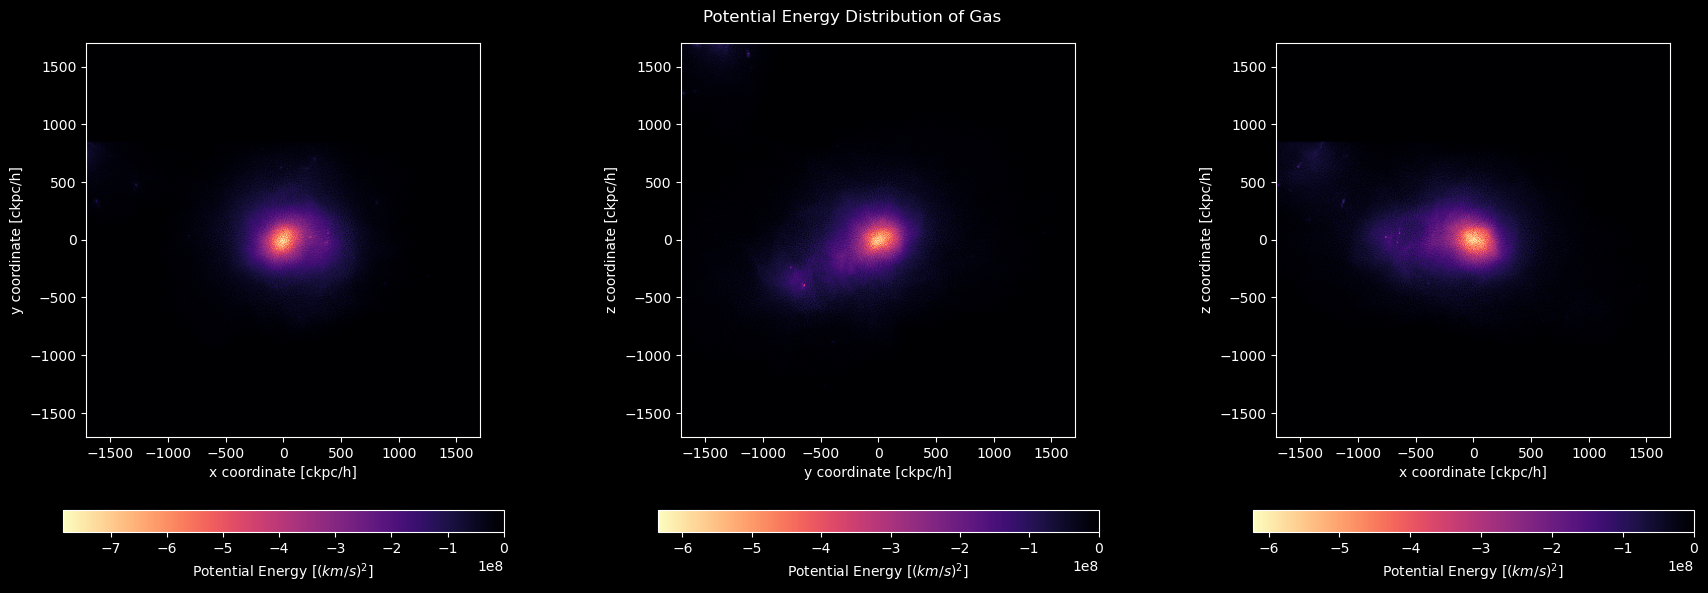

In [16]:
if halo_data['GroupLenType'][partype[0]] != 0:
    info = sn.loadHalo(basePath, SnapNum, haloID, partype[0], fields=fields)
    x = info['Coordinates'][:, 0] - halo_pos[0]
    y = info['Coordinates'][:, 1] - halo_pos[1]
    z = info['Coordinates'][:, 2] - halo_pos[2]
    wt = info['Potential']
    act_wt = wt / h
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(18, 6))
    ax1, ax2, ax3 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    
    # ax1.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, y, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im1 = ax1.imshow(grid, extent=extent, cmap='magma_r')
    ax1.set_xlabel('x coordinate [ckpc/h]')
    ax1.set_ylabel('y coordinate [ckpc/h]')
    fig.colorbar(im1, ax=ax1, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    # ax2.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(y, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im2 = ax2.imshow(grid, extent=extent, cmap='magma_r')
    ax2.set_xlabel('y coordinate [ckpc/h]')
    ax2.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im2, ax=ax2, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    # ax3.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im3 = ax3.imshow(grid, extent=extent, cmap='magma_r')
    ax3.set_xlabel('x coordinate [ckpc/h]')
    ax3.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im3, ax=ax3, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    plt.suptitle('Potential Energy Distribution of Gas')
    plt.tight_layout()
    plt.savefig('Ex11a.png')
    plt.show()

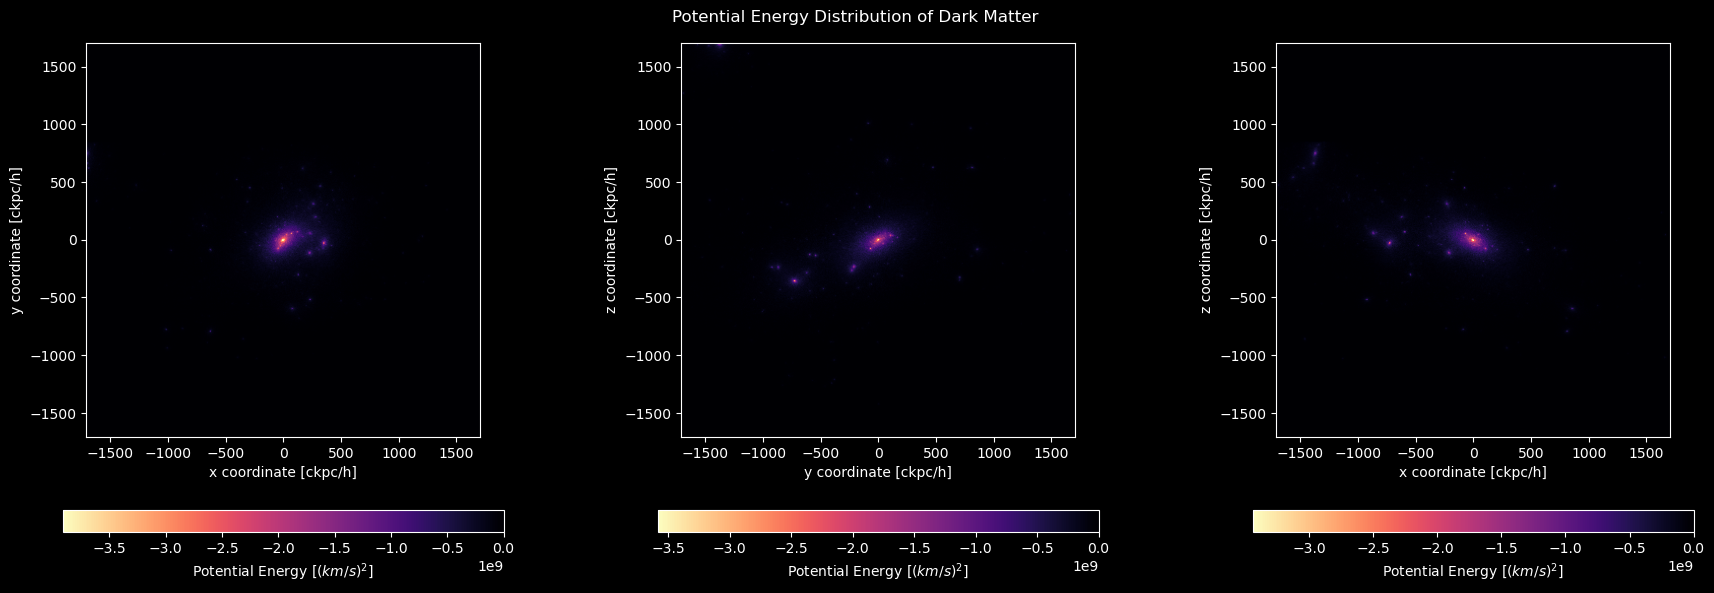

In [17]:
if halo_data['GroupLenType'][partype[1]] != 0:
    info = sn.loadHalo(basePath, SnapNum, haloID, partype[1], fields=fields)
    x = info['Coordinates'][:, 0] - halo_pos[0]
    y = info['Coordinates'][:, 1] - halo_pos[1]
    z = info['Coordinates'][:, 2] - halo_pos[2]
    wt = info['Potential']
    act_wt = wt / h
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(18, 6))
    ax1, ax2, ax3 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    
    # ax1.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, y, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im1 = ax1.imshow(grid, extent=extent, cmap='magma_r')
    ax1.set_xlabel('x coordinate [ckpc/h]')
    ax1.set_ylabel('y coordinate [ckpc/h]')
    fig.colorbar(im1, ax=ax1, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    # ax2.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(y, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im2 = ax2.imshow(grid, extent=extent, cmap='magma_r')
    ax2.set_xlabel('y coordinate [ckpc/h]')
    ax2.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im2, ax=ax2, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    # ax3.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im3 = ax3.imshow(grid, extent=extent, cmap='magma_r')
    ax3.set_xlabel('x coordinate [ckpc/h]')
    ax3.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im3, ax=ax3, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    plt.suptitle('Potential Energy Distribution of Dark Matter')
    plt.tight_layout()
    plt.savefig('Ex11b.png')
    plt.show()

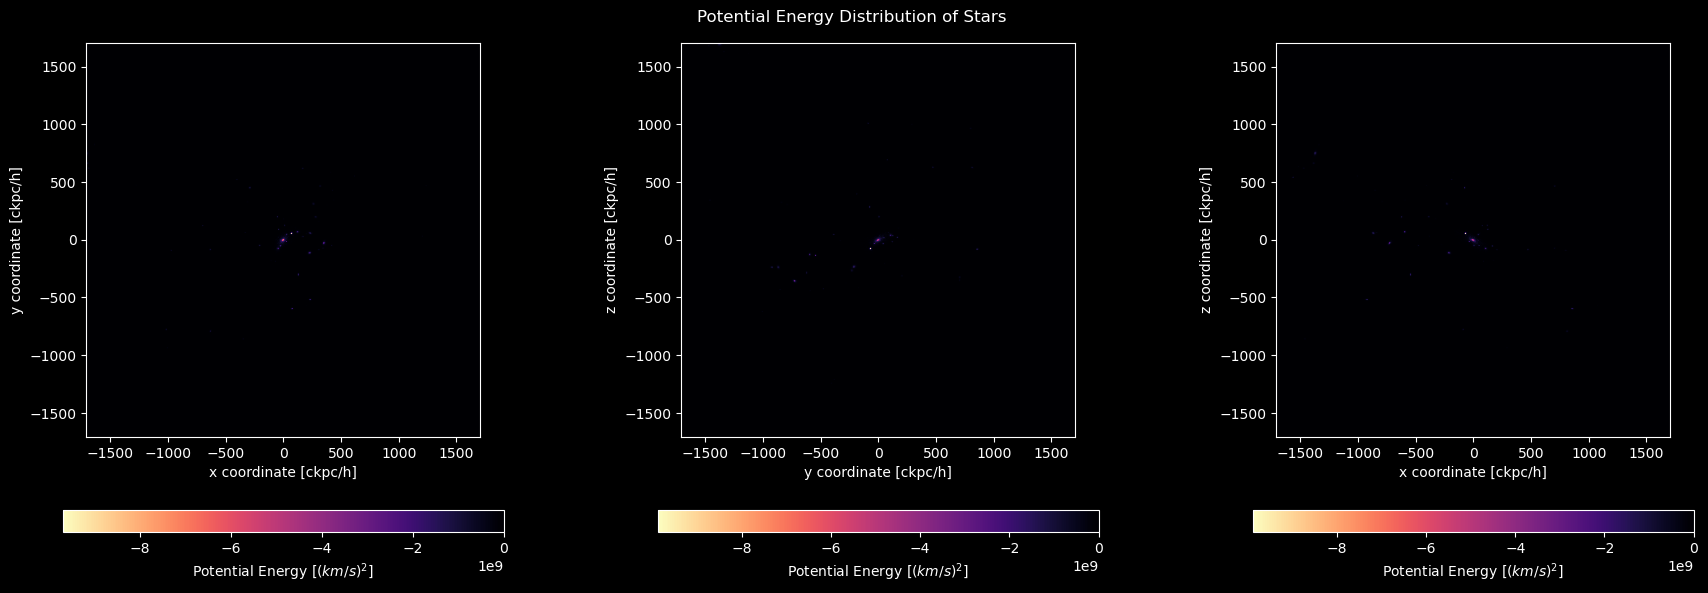

In [18]:
if halo_data['GroupLenType'][partype[2]] != 0:
    info = sn.loadHalo(basePath, SnapNum, haloID, partype[2], fields=fields)
    x = info['Coordinates'][:, 0] - halo_pos[0]
    y = info['Coordinates'][:, 1] - halo_pos[1]
    z = info['Coordinates'][:, 2] - halo_pos[2]
    wt = info['Potential']
    act_wt = wt / h
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(18, 6))
    ax1, ax2, ax3 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    
    # ax1.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, y, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im1 = ax1.imshow(grid, extent=extent, cmap='magma_r')
    ax1.set_xlabel('x coordinate [ckpc/h]')
    ax1.set_ylabel('y coordinate [ckpc/h]')
    fig.colorbar(im1, ax=ax1, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    # ax2.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(y, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im2 = ax2.imshow(grid, extent=extent, cmap='magma_r')
    ax2.set_xlabel('y coordinate [ckpc/h]')
    ax2.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im2, ax=ax2, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    # ax3.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im3 = ax3.imshow(grid, extent=extent, cmap='magma_r')
    ax3.set_xlabel('x coordinate [ckpc/h]')
    ax3.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im3, ax=ax3, fraction=0.045, orientation='horizontal', label='Potential Energy [$(km/s)^{2}$]')
    
    plt.suptitle('Potential Energy Distribution of Stars')
    plt.tight_layout()
    plt.savefig('Ex11c.png')
    plt.show()

In [19]:
fields_new = ['Coordinates', 'SubfindDMDensity']

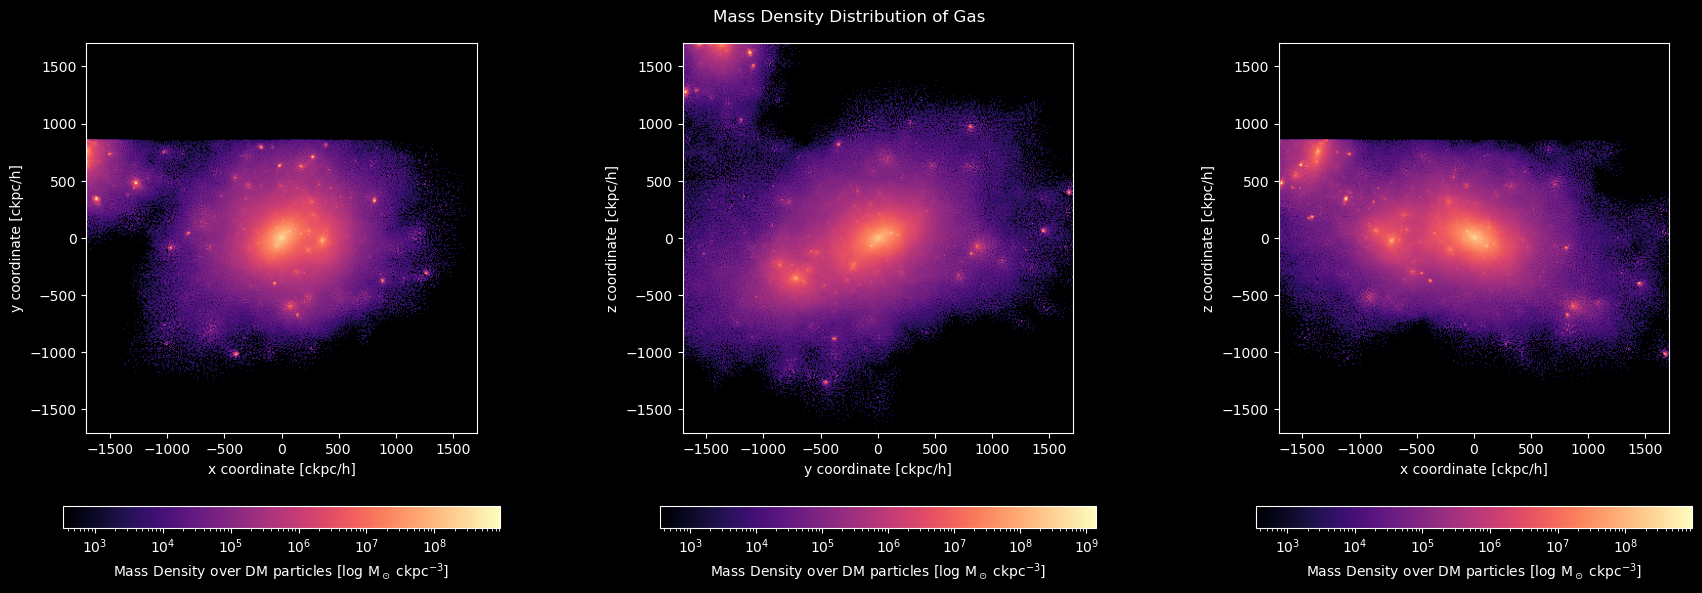

In [20]:
if halo_data['GroupLenType'][partype[0]] != 0:
    info = sn.loadHalo(basePath, SnapNum, haloID, partype[0], fields=fields_new)
    x = info['Coordinates'][:, 0] - halo_pos[0]
    y = info['Coordinates'][:, 1] - halo_pos[1]
    z = info['Coordinates'][:, 2] - halo_pos[2]
    wt = info['SubfindDMDensity']
    act_wt = wt * 1e10 * h**2
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(18, 6))
    ax1, ax2, ax3 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    
    # ax1.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, y, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im1 = ax1.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax1.set_xlabel('x coordinate [ckpc/h]')
    ax1.set_ylabel('y coordinate [ckpc/h]')
    fig.colorbar(im1, ax=ax1, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    # ax2.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(y, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im2 = ax2.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax2.set_xlabel('y coordinate [ckpc/h]')
    ax2.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im2, ax=ax2, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    # ax3.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im3 = ax3.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax3.set_xlabel('x coordinate [ckpc/h]')
    ax3.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im3, ax=ax3, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    plt.suptitle('Mass Density Distribution of Gas')
    plt.tight_layout()
    plt.savefig('Ex11d.png')
    plt.show()

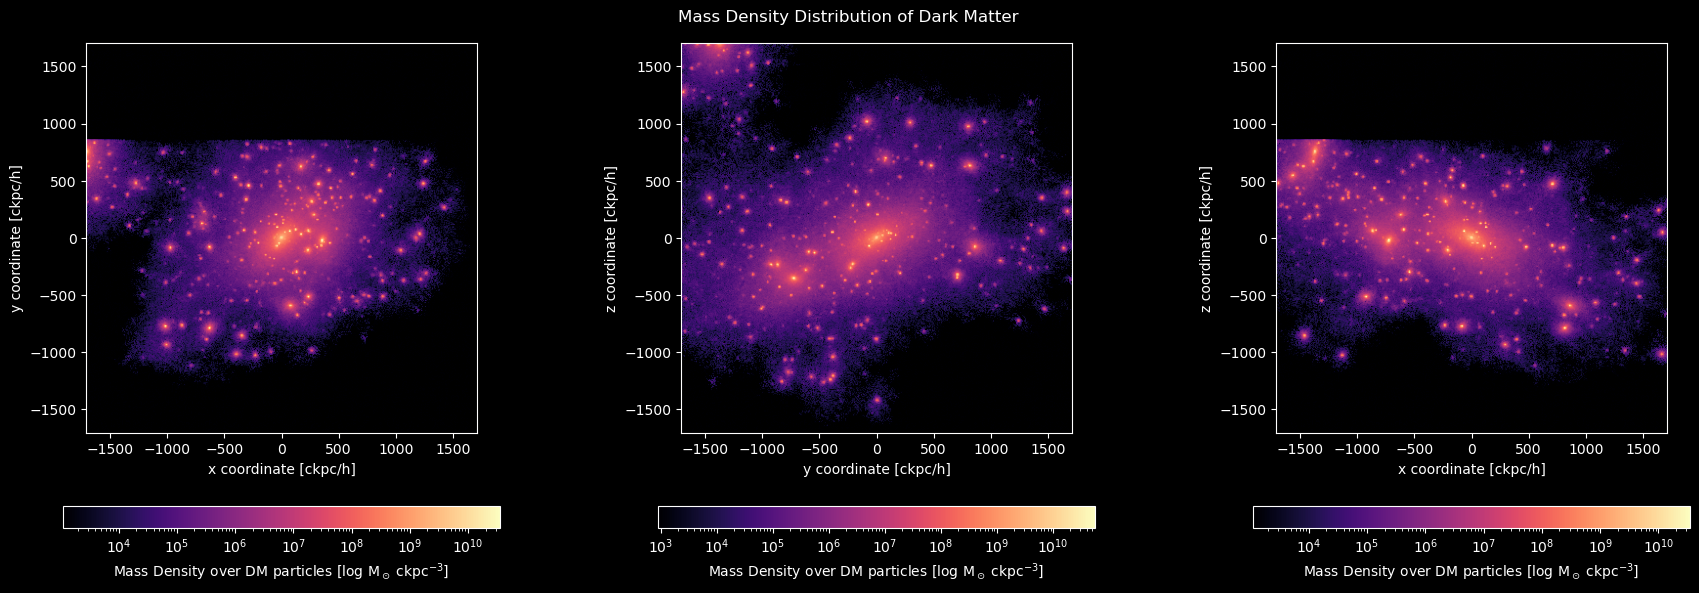

In [21]:
if halo_data['GroupLenType'][partype[1]] != 0:
    info = sn.loadHalo(basePath, SnapNum, haloID, partype[1], fields=fields_new)
    x = info['Coordinates'][:, 0] - halo_pos[0]
    y = info['Coordinates'][:, 1] - halo_pos[1]
    z = info['Coordinates'][:, 2] - halo_pos[2]
    wt = info['SubfindDMDensity']
    act_wt = wt * 1e10 * h**2
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(18, 6))
    ax1, ax2, ax3 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    
    # ax1.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, y, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im1 = ax1.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax1.set_xlabel('x coordinate [ckpc/h]')
    ax1.set_ylabel('y coordinate [ckpc/h]')
    fig.colorbar(im1, ax=ax1, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    # ax2.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(y, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im2 = ax2.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax2.set_xlabel('y coordinate [ckpc/h]')
    ax2.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im2, ax=ax2, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    # ax3.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im3 = ax3.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax3.set_xlabel('x coordinate [ckpc/h]')
    ax3.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im3, ax=ax3, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    plt.suptitle('Mass Density Distribution of Dark Matter')
    plt.tight_layout()
    plt.savefig('Ex11e.png')
    plt.show()

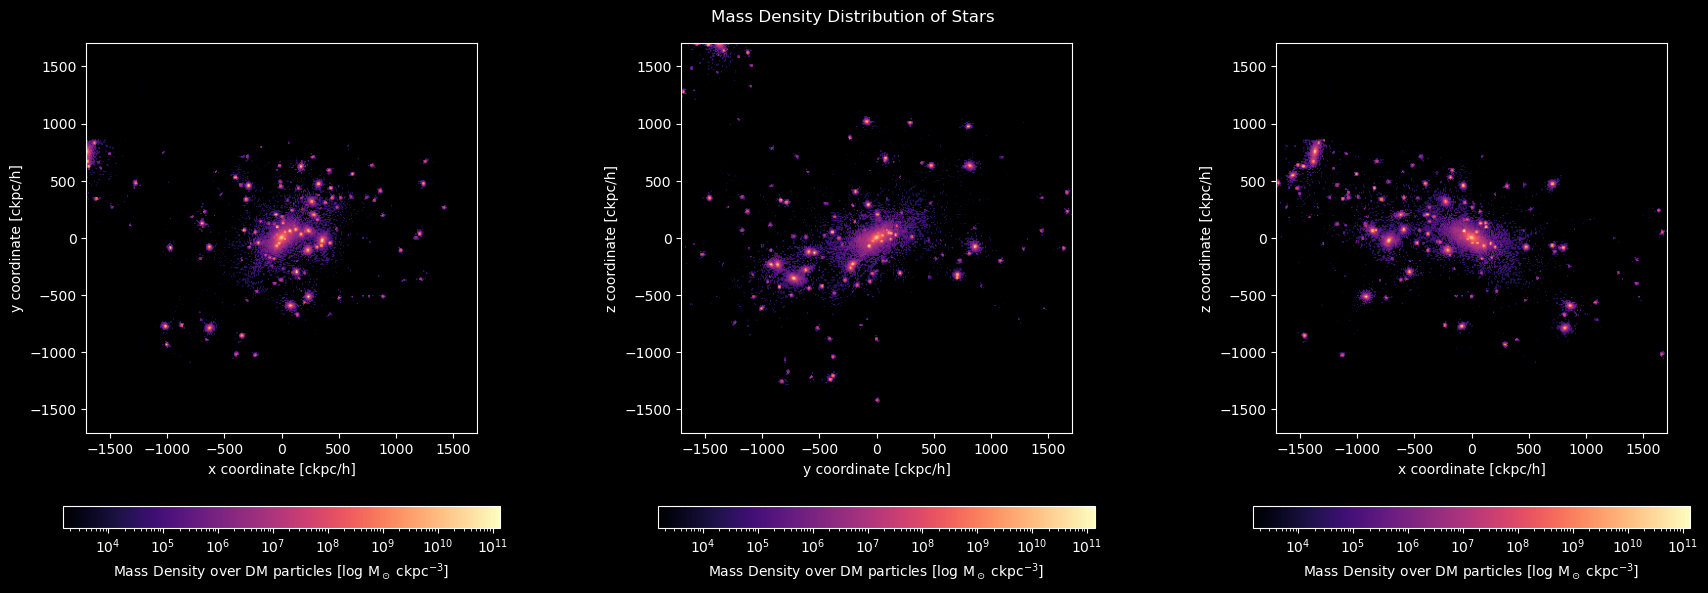

In [22]:
if halo_data['GroupLenType'][partype[2]] != 0:
    info = sn.loadHalo(basePath, SnapNum, haloID, partype[2], fields=fields_new)
    x = info['Coordinates'][:, 0] - halo_pos[0]
    y = info['Coordinates'][:, 1] - halo_pos[1]
    z = info['Coordinates'][:, 2] - halo_pos[2]
    wt = info['SubfindDMDensity']
    act_wt = wt * 1e10 * h**2
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(18, 6))
    ax1, ax2, ax3 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    
    # ax1.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, y, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im1 = ax1.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax1.set_xlabel('x coordinate [ckpc/h]')
    ax1.set_ylabel('y coordinate [ckpc/h]')
    fig.colorbar(im1, ax=ax1, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    # ax2.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(y, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im2 = ax2.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax2.set_xlabel('y coordinate [ckpc/h]')
    ax2.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im2, ax=ax2, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    # ax3.autoscale(False)
    grid, _, _, _ = binned_statistic_2d(x, z, act_wt, 'sum', bins=nPixels, range=[minMax, minMax])
    im3 = ax3.imshow(grid, extent=extent, norm='log', cmap='magma')
    ax3.set_xlabel('x coordinate [ckpc/h]')
    ax3.set_ylabel('z coordinate [ckpc/h]')
    fig.colorbar(im3, ax=ax3, fraction=0.045, orientation='horizontal', label='Mass Density over DM particles [log M$_\odot$ ckpc$^{-3}$]')
    
    plt.suptitle('Mass Density Distribution of Stars')
    plt.tight_layout()
    plt.savefig('Ex11f.png')
    plt.show()